In [85]:
import numpy as np
from matplotlib import pyplot as plt

In [86]:
n = 150
x0 = n * 0.5
x = np.arange(n)

<StemContainer object of 3 artists>

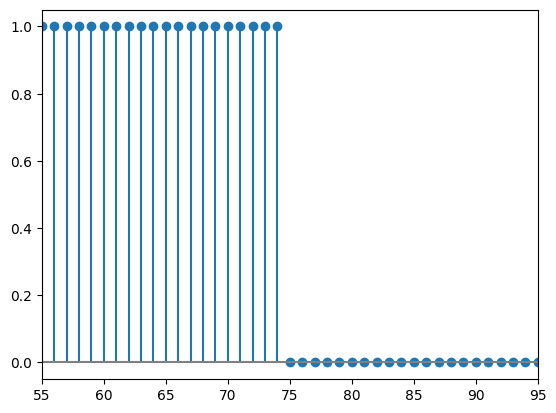

In [89]:
z = x < x0
plt.xlim(x0 - 20, x0 + 20)
plt.stem(x,z, basefmt="gray")

In [91]:
def wavenum(i) : return (i + n // 2) % n - n // 2

In [92]:
# fractional shift
delta = 0.25
H = np.exp(-2j * wavenum(x) / n * np.pi * delta)
if n & 1:
    idx0, idx1 = n//2, 1 + n//2
    #ambiguous = np.exp(-2j * (n - 1) / n * np.pi * delta)
    print("wavenums", wavenum(idx0), wavenum(idx1))
    print("H:", H[idx0], H[idx1])
else :
    idx0 = n//2
    ambiguous = np.exp(-2j * (n//2) / n * np.pi * delta)
    print("H:", H[idx0], ambiguous)
    H[idx0] = 0.5 * (ambiguous + 1/ambiguous)
    print("new H:", H[idx0])

H: (0.7071067811865476+0.7071067811865475j) (0.7071067811865476-0.7071067811865475j)
new H: (0.7071067811865476+0j)


In [ ]:
#lanczos smoothing
G = np.zeros(n)
M = 0
#we pick the support of the smoothing window depending on the fract
#ional shift
mydistance = np.abs(np.mod(delta, 1) - 0.5)
if mydistance < 0.5 - 0.03125:
    M = 1
if mydistance < 0.5 - 0.0125:
    M = 2
if mydistance < 0.5 - 0.25:
    M = 3
print("M is ", M)
if M:
    for i in range(n):
        k = wavenum(i)
        a = 2 * np.pi / n * k * M
        #weighted average of (1/2 + 1/2 cos(pi / M * x))
        if True:
            if 4 * k == -n or 4 * k == n:
                G[i] += 1
            else:
                G[i] += 2 * a * np.sin(a) / (np.pi**2 - a**2)
        if True:
            if i:
                G[i] += 2 * np.sin(a) / (a)
            else:
                G[i] += 2
        G[i] *= 0.5
        if k == -n//2 :
            print("fs: ", G[i], np.sin(-a) / -a)
else :
    G = np.ones(n)
#plot frequency response
from numpy import fft as fft
plt.plot(np.arange(n) - n//2, fft.fftshift(G))